Fashion-MNIST是Zalando's article的数据集-包含60,000个示例的训练集和10,000个示例的测试集。 

每个示例都是一个28x28灰度图像，与来自10个类别的标签相关联。

Zalando打算将Fashion-MNIST用作直接替代原始MNIST数据集。两个minst数据集具有相同的图像大小以及训练和测试分割的结构。

原始MNIST数据集包含许多手写数字。而Fashion-MNIST包含了一系列的时尚服装分类相关的像素图

以下是标签类别：
```txt
Labels：
Each training and test example is assigned to one of the following labels:
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

0T恤/上衣
1裤子
2套头衫
3礼服
4外套
5凉鞋
6衬衫
7运动鞋
8背包
9靴
```
主要需要用到的文件分别为fashion-mnist_train.csv 和 fashion-mnist_test.csv 分别用作测试集和数据集。


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte


In [2]:
from subprocess import check_output
print(check_output(["ls","../input/fashionmnist"]).decode("utf8"))

fashion-mnist_test.csv
fashion-mnist_train.csv
t10k-images-idx3-ubyte
t10k-labels-idx1-ubyte
train-images-idx3-ubyte
train-labels-idx1-ubyte



In [3]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

data_train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
data_test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)


Using TensorFlow backend.


In [4]:
print(input_shape)
print()
print(data_train.shape)
print()
print(data_test.shape)

(28, 28, 1)

(60000, 785)

(10000, 785)


In [5]:
#在数据集df中用.iloc将标签和特征切片
X=np.array(data_train.iloc[:,1:])
y_=np.array(data_train.iloc[:,0 ])

In [6]:
print(X)
print()
print(y_)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

[2 9 6 ... 8 8 7]


In [7]:
#用to_categorical转换one-hot
y=to_categorical(y_)
print(y)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [8]:
#在训练集中划分验证集
print(X.shape)
print()
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,
                                             random_state=13)
print(X_train.shape)
print()

(60000, 784)

(48000, 784)



# train,test和val，训练集测试集和验证集有什么区别

## 摘要自一篇英文文档 
A validation dataset is a sample of data held back from training your model that is used to give an estimate of model skill while tuning model’s hyperparameters.
The validation dataset is different from the test dataset that is also held back from the training of the model, but is instead used to give an unbiased estimate of the skill of the final tuned model when comparing or selecting between final models.

## 含义

* 在模型训练的过程中常常要调整网络的参数和超参数来优化模型效果。
* train dataset(训练集)用于调整模型参数（权重、维度、系数等等可以根据训练数据本身估计寻优的值，存在模型内部）
* validation dataset（验证集）用于调整模型的超参数（学习速率，迭代次数等等外部人为预设的参数，无法通过数据来寻找最优，而是通过经验或者反复验证来寻优），在实际操作中，val验证集是取自训练集的
* test dataset(测试集）是用于最终比较调整结果好坏的数据，对test拟合最好的模型得到选用。



In [9]:
#另一种划分,如果修改随机数种子random_state会造成划分结果的内容的不同（随机切分行）
X_train2,X_val2,y_train2,y_val2=train_test_split(X,y,test_size=0.3,
                                             random_state=13)
print(X_train2.shape)
print()

(42000, 784)



In [10]:
#Test data
X_test=np.array(data_test.iloc[:,1:])
y_test=to_categorical(np.array(data_test.iloc[:,0]))
print(X_test)
print()
print(y_test)
print()
print(X_test.shape)
print()
print(y_test.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 1 3 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]]

(10000, 784)

(10000, 10)


In [11]:
#对数据进行reshape,原本一行784个数据像素顺序排列，现在依照28*28排列到新矩阵的2,3维度
X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
X_val=X_val.reshape(X_val.shape[0],img_rows,img_cols,1)

print(X_train.shape)

(48000, 28, 28, 1)


In [12]:
#数据标准定为float32
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_val=X_val.astype('float32')
print(X_train[1][1][1][0])
print(type(X_train[1][1][1][0]))
print()
#归一化（maxmin）
X_train/=255
X_test/=255
X_val/=255

0.0
<class 'numpy.float32'>



# X_train[1][1][1][0]对应的原值被转化为float32
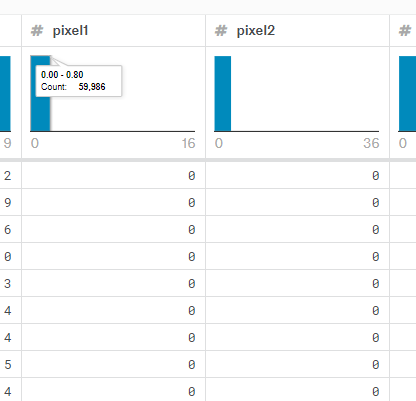

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.layers.normalization import BatchNormalization


In [14]:
#一次送入256batch的数据
#分10类
#50个迭代次数，一个epochs表示将训练集中所有的样本完整过一遍
batch_size=256
num_classes=10
epochs=50

img_rows,img_cols=28,28

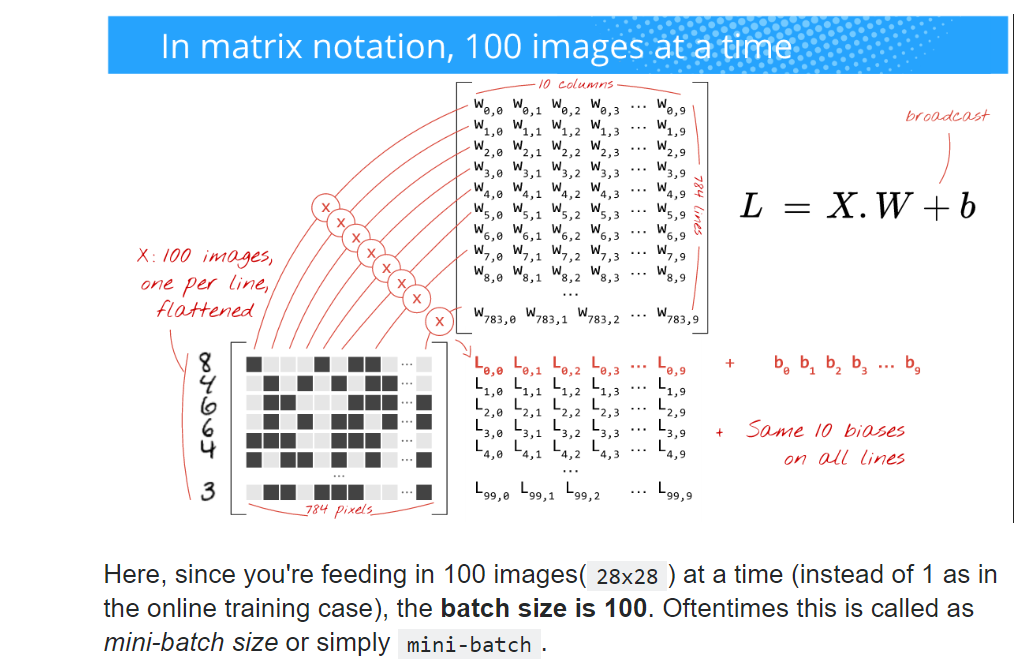

In [15]:

#调用keras的顺序模型model，并且利用model.add进行模型的逐层构建
#下列结构是按照CNN卷积网络结构顺序构建
model=Sequential()
#第一层卷积层
#第一个参数32，filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
#激活函数用relu，初始化权值方式是“HE正态分布”
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
#2Dmaxpooling过程，在图像中2*2的范围取最大
model.add(MaxPooling2D((2,2)))
#dropout层能让通过信号一定概率停止（0.25）
model.add(Dropout(0.25))
#再加一层过滤器，输出64个特征
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Dropout(0.4))
#类似压缩，flatten可以让多维的变得扁平（flat）
model.add(Flatten())
#dense全连接层，128个filter，用relu激活函数过滤
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.3))
#最后一层全连接按照标签数据来输出，用softmax作为激活函数
model.add(Dense(num_classes,activation='softmax'))
#compile完成模型的编译，使用categorical_crossentropy交叉熵，优化器基于Adam算法（一种优化损失函数的自适应学习率的算法）
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])#用准确率作为评估好坏的指标

# Adam算法推导公式

* ~theta是最终计算出的参数（权重）调整多少的值
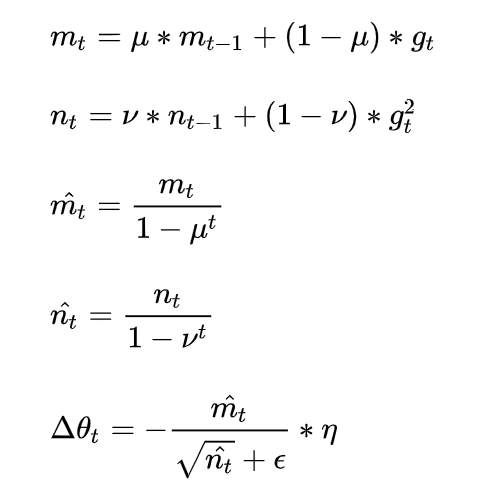

In [16]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

In [17]:
#训练
#用fit方法拟合，输入训练集，和初始化参数
history=model.fit(X_train,y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_data=(X_val,y_val))
#利用keras的evaluate接口，用测试集进行最终的性能评估
#evaluate:Returns the loss value & metrics values for the model in test mode.
score=model.evaluate(X_test,y_test,verbose=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 29s 604us/step - loss: 0.6462 - accuracy: 0.7674 - val_loss: 0.4016 - val_accuracy: 0.8553
Epoch 2/50
48000/48000 [==============================] - 27s 553us/step - loss: 0.4087 - accuracy: 0.8538 - val_loss: 0.3277 - val_accuracy: 0.8810
Epoch 3/50
48000/48000 [==============================] - 27s 569us/step - loss: 0.3512 - accuracy: 0.8736 - val_loss: 0.2972 - val_accuracy: 0.8921
Epoch 4/50
48000/48000 [==============================] - 28s 574us/step - loss: 0.3220 - accuracy: 0.8831 - val_loss: 0.2855 - val_accuracy: 0.8945
Epoch 5/50
48000/48000 [==============================] - 27s 559us/step - loss: 0.2973 - accuracy: 0.8923 - val_loss: 0.2682 - val_accuracy: 0.9012
Epoch 6/50
48000/48000 [==============================] - 26s 550us/step - loss: 0.2762 - accuracy: 0.9004 - val_loss: 0.2584 - val_accuracy: 0.9060
Epoch 7/50
48000/48000 [==============================] 

In [20]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2252901750743389
Test accuracy: 0.9327999949455261


In [42]:
#新老版本的keras对history内置对象名称的定义不同
for key,values in  dict.items(history.history):
    print (key)

val_loss
val_accuracy
loss
accuracy


History

> keras.callbacks.History()

把所有事件都记录到 History 对象的回调函数。

这个回调函数被自动启用到每一个 Keras 模型。History 对象会被模型的 fit 方法返回。

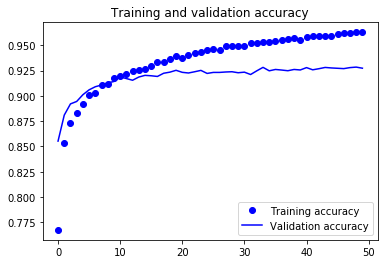

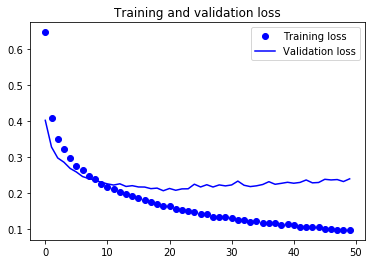

In [38]:
import matplotlib.pyplot as plt#导入plt绘制loss
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [39]:
predicted_classes = model.predict_classes(X_test)
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]
from sklearn.metrics import classification_report#调用classification_report打印模型性能报告
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.89      0.88      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.90      0.90      0.90      1000
     Class 3       0.94      0.94      0.94      1000
     Class 4       0.92      0.89      0.91      1000
     Class 5       0.99      0.98      0.98      1000
     Class 6       0.81      0.81      0.81      1000
     Class 7       0.97      0.95      0.96      1000
     Class 8       0.98      0.99      0.99      1000
     Class 9       0.96      0.98      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


很明显，我们的模型对于第六类来说准确率和召回率都较低。对于第2类，分类器稍微缺乏精度，而对于第4类，分类器稍微缺乏召回率。